<a href="https://colab.research.google.com/github/ayushanand18/FasterRCNN-Great-Barrier-Reef/blob/main/Image_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Transformations
In this notebook I would like to experiment with different image transformations such as reshaping, upscaling, downscaling, rotation, normalizing, etc.

We will download a sample dataset and start our experiment.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Image
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms

## Importing Dataset
So we'll experiment with the **CIFAR10** data. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 
### About CIFAR10 Dataset
**Download size**: 162.17 MiB

**Dataset size**: 132.40 MiB

In [2]:
PTData=datasets.CIFAR10('/content/torch_data/',download=True, transform=ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/torch_data/cifar-10-python.tar.gz to /content/torch_data/


In [3]:
data_loader = torch.utils.data.DataLoader(PTData,
                                          batch_size=4,
                                          shuffle=True)

In [4]:
samplebatch=next(iter(data_loader))
samplebatch[0].shape

torch.Size([4, 3, 32, 32])

We just got a sample batch which contains 4 images, with shape (3,32,32) each. Now we'll look at each image one by one.

<Figure size 432x288 with 0 Axes>

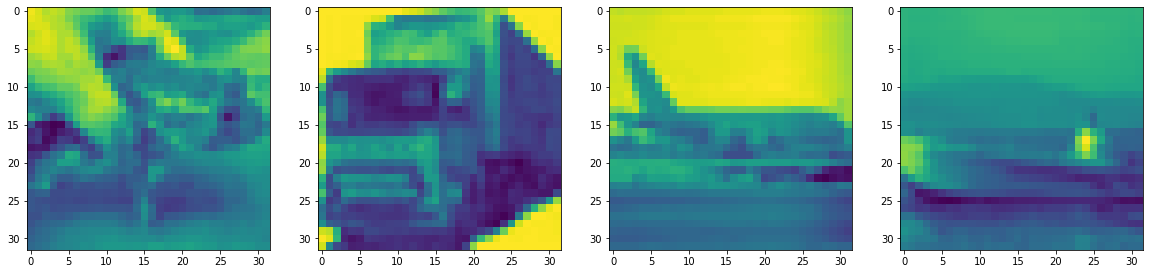

In [5]:
plt.figure()
f,axo=plt.subplots(1,4, figsize=(20,50))
for i in range(4):
  axo[i].imshow(samplebatch[0][i][0,:,:])


## Importing Custom Images
These images from CIFAR10 dataset are too small (32*32). What if we visualize and import bigger images. Let us download some from the internet.

In [6]:
!wget 'https://cdn.pixabay.com/photo/2015/04/19/08/32/marguerite-729510__480.jpg'
!wget 'https://cdn.eso.org/images/thumb300y/eso1907a.jpg'
!wget 'https://www.fotoaparat.cz/imgs/a/26/2639/0n1wjdf0-cr-em13-09-1200x627x9.jpg'

--2021-12-24 09:48:19--  https://cdn.pixabay.com/photo/2015/04/19/08/32/marguerite-729510__480.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:14b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25786 (25K) [image/jpeg]
Saving to: ‘marguerite-729510__480.jpg’

marguerite-729510__ 100%[===================>]  25.18K  --.-KB/s    in 0s      

2021-12-24 09:48:19 (105 MB/s) - ‘marguerite-729510__480.jpg’ saved [25786/25786]

--2021-12-24 09:48:19--  https://cdn.eso.org/images/thumb300y/eso1907a.jpg
Resolving cdn.eso.org (cdn.eso.org)... 89.187.177.17, 195.181.169.2, 156.146.36.23, ...
Connecting to cdn.eso.org (cdn.eso.org)|89.187.177.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7817 (7.6K) [image/jpeg]
Saving to: ‘eso1907a.jpg’

eso1907a.jpg        100%[===================>]   7.63K  --.-KB/s    in 0s      

2021-12-

First image is of a flower, the second one of a solar ecplise and the third one of a bird.

In [7]:
#Defining the path of downloaded images
p1,p2,p3='/content/marguerite-729510__480.jpg','/content/eso1907a.jpg','/content/0n1wjdf0-cr-em13-09-1200x627x9.jpg'

#### Visualizing through matplotlib

<Figure size 432x288 with 0 Axes>

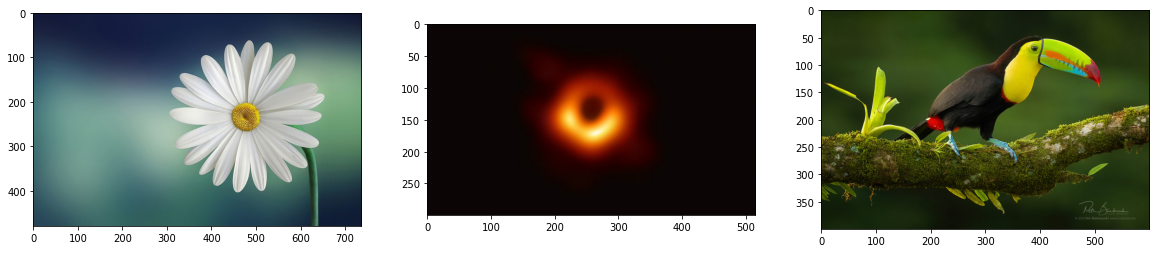

In [8]:
i1,i2,i3=cv2.imread(p1),cv2.imread(p2),cv2.imread(p3)
i1,i2,i3=cv2.cvtColor(i1, cv2.COLOR_BGR2RGB),cv2.cvtColor(i2, cv2.COLOR_BGR2RGB),cv2.cvtColor(i3, cv2.COLOR_BGR2RGB)
#since images are in bgr and matplotlib understands them in rgb we needed it to convert.
plt.figure();
f,axarr=plt.subplots(1,3, figsize=(20,60))
axarr[0].imshow(i1)
axarr[1].imshow(i2)
axarr[2].imshow(i3)

Wow! They just look beautiful.

Now let us transform our first image.

#### Reading through PIL

In [35]:
#first lets convert numpy array to PIL images
pil1,pil2,pil3=Image.fromarray(i1),Image.fromarray(i2),Image.fromarray(i3)

**A horizontal Flip**

In [ ]:
transform = transforms.Compose(
    [transforms.RandomHorizontalFlip(p=0.9)])
transform(pil1)

**A 90 deg rotation**

In [ ]:
transform=transforms.Compose([transforms.RandomRotation(degrees=180)])
transform(pil1)

**What about a color filter**

In [ ]:
transform=transforms.Compose([transforms.ColorJitter(brightness=2,contrast=0.2,saturation=0.7,hue=0.5)])
transform(pil1)

Great! These values look great. A bland background and a very clear figure - that's all we need. Now let us put in the same transform to our other pictures. Below was our original image.

In [ ]:
pil1

#### Picture 2

In [ ]:
transform(pil2)

Our original image.

In [ ]:
pil2

#### Picture 3

In [ ]:
transform(pil3)

Original Image:

In [ ]:
pil3

Now let's do a `Grayscale` transformation

In [ ]:
transform=transforms.Compose([transforms.Grayscale(num_output_channels=1)])
transform(pil3)

Looks like an image from the World War era, isn't it?

## Conclusion
Great! We are done with the experiments. We experimented with,
+ CIFAR10 data
+ 3 custom images from the internet.

and applied the `torchvision transformations`
+ `RandomHorizontalFlip`
+ `RandomRotation`
+ `ColorJitter`
+ `Grayscale`